#### Objective: Exploratory data anlaysis on hive tables using pyspark

#### Import dependencies and initiate SparkSession

In [110]:
# import dependencies

from pyspark.sql import SparkSession
import pandas as pd
import matplotlib.pyplot as plt
from pyspark.sql.functions import *

%matplotlib inline

In [2]:
# initiate SparkSession that can connect to the hive metastore and run hive queries

spark = (SparkSession.builder.appName("app_name") \
                         .config("hive.metastore.uris","thrift://ip-10-1-2-24.ap-south-1.compute.internal:9083") \
                         .enableHiveSupport().getOrCreate())

#### Importing the required hive tables into spark DataFrame

In [8]:
employees_df = spark.table('anshulalab.employees_cap')
salaries_df = spark.table('anshulalab.salaries_cap')
departments_df = spark.table('anshulalab.departments_cap')
titles_df = spark.table('anshulalab.titles_cap')
dept_manager_df = spark.table('anshulalab.dept_manager_cap')
dept_emp_df = spark.table('anshulalab.dept_emp_cap')

In [7]:
employees_df.show(truncate=False)

+------+------------+----------+----------+----------+---+----------+--------------+-----------------------+------------+----------+
|emp_no|emp_title_id|birth_date|first_name|last_name |sex|hire_date |no_of_projects|last_performance_rating|left_company|last_date |
+------+------------+----------+----------+----------+---+----------+--------------+-----------------------+------------+----------+
|473302|s0001       |1953-07-25|Hideyuki  |Zallocco  |M  |1990-04-28|2             |A                      |false       |null      |
|475053|e0002       |1954-11-18|Byong     |Delgrande |F  |1991-09-07|1             |C                      |false       |null      |
|57444 |e0002       |1958-01-30|Berry     |Babb      |F  |1992-03-21|9             |A                      |false       |null      |
|421786|s0001       |1957-09-28|Xiong     |Verhoeff  |M  |1987-11-26|2             |C                      |false       |null      |
|282238|e0003       |1952-10-28|Abdelkader|Baumann   |F  |1991-01-18|

In [9]:
salaries_df.show()

+------+------+
|emp_no|salary|
+------+------+
| 10001| 60117|
| 10002| 65828|
| 10003| 40006|
| 10004| 40054|
| 10005| 78228|
| 10006| 40000|
| 10007| 56724|
| 10008| 46671|
| 10009| 60929|
| 10010| 72488|
| 10011| 42365|
| 10012| 40000|
| 10013| 40000|
| 10014| 46168|
| 10015| 40000|
| 10016| 70889|
| 10017| 71380|
| 10018| 55881|
| 10019| 44276|
| 10020| 40000|
+------+------+
only showing top 20 rows



In [10]:
titles_df.show()

+--------+------------------+
|title_id|             title|
+--------+------------------+
|   s0001|             Staff|
|   s0002|      Senior Staff|
|   e0001|Assistant Engineer|
|   e0002|          Engineer|
|   e0003|   Senior Engineer|
|   e0004|  Technique Leader|
|   m0001|           Manager|
+--------+------------------+



In [11]:
departments_df.show()

+-------+------------------+
|dept_no|         dept_name|
+-------+------------------+
|   d001|         Marketing|
|   d002|           Finance|
|   d003|   Human Resources|
|   d004|        Production|
|   d005|       development|
|   d006|Quality Management|
|   d007|             Sales|
|   d008|          Research|
|   d009|  Customer Service|
+-------+------------------+



In [12]:
dept_manager_df.show()

+-------+------+
|dept_no|emp_no|
+-------+------+
|   d001|110022|
|   d001|110039|
|   d002|110085|
|   d002|110114|
|   d003|110183|
|   d003|110228|
|   d004|110303|
|   d004|110344|
|   d004|110386|
|   d004|110420|
|   d005|110511|
|   d005|110567|
|   d006|110725|
|   d006|110765|
|   d006|110800|
|   d006|110854|
|   d007|111035|
|   d007|111133|
|   d008|111400|
|   d008|111534|
+-------+------+
only showing top 20 rows



In [13]:
dept_emp_df.show()

+------+-------+
|emp_no|dept_no|
+------+-------+
| 10001|   d005|
| 10002|   d007|
| 10003|   d004|
| 10004|   d004|
| 10005|   d003|
| 10006|   d005|
| 10007|   d008|
| 10008|   d005|
| 10009|   d006|
| 10010|   d004|
| 10010|   d006|
| 10011|   d009|
| 10012|   d005|
| 10013|   d003|
| 10014|   d005|
| 10015|   d008|
| 10016|   d007|
| 10017|   d001|
| 10018|   d004|
| 10018|   d005|
+------+-------+
only showing top 20 rows



#### Exploratory data analysis

In [18]:
##### 1(a). Get the list of employee number, last name, first name, sex, and salary of each employee

## using spark sql

spark.sql("""select t1.emp_no, t1.first_name, t1.last_name, t1.sex, t2.salary 
             from anshulalab.employees_cap t1
             join anshulalab.salaries_cap t2 on t1.emp_no = t2.emp_no""").show()

+------+----------+----------+---+------+
|emp_no|first_name| last_name|sex|salary|
+------+----------+----------+---+------+
|473302|  Hideyuki|  Zallocco|  M| 40000|
|475053|     Byong| Delgrande|  F| 53422|
| 57444|     Berry|      Babb|  F| 48973|
|421786|     Xiong|  Verhoeff|  M| 40000|
|282238|Abdelkader|   Baumann|  F| 40000|
|263976|      Eran|  Cusworth|  M| 40000|
|273487| Christoph|   Parfitt|  M| 56087|
|461591|    Xudong|  Samarati|  M| 40000|
|477657|    Lihong| Magliocco|  M| 54816|
|219881| Kwangyoen|     Speek|  F| 40000|
| 29920|   Shuichi|     Tyugu|  F| 40000|
|208153|   Abdulah|      Lunn|  M| 50183|
| 13616|     Perry|     Lorho|  F| 40000|
|246449|     Subbu|Bultermann|  F| 87084|
| 21529|     Bojan|  Zallocco|  M| 40000|
| 17934|  Bilhanan|  Wuwongse|  M| 48795|
| 48085|Venkatesan|      Gilg|  M| 63016|
|239838|   Naftali|     Dulli|  M| 57715|
|240129|     Roddy|    Karnin|  M| 43548|
|205246|     Nevio|    Demizu|  F| 80252|
+------+----------+----------+---+

In [24]:
## using spark dataframe

employees_df.join(salaries_df, 'emp_no').select('emp_no', 'last_name','first_name','sex','salary').show()

+------+----------+----------+---+------+
|emp_no| last_name|first_name|sex|salary|
+------+----------+----------+---+------+
|473302|  Zallocco|  Hideyuki|  M| 40000|
|475053| Delgrande|     Byong|  F| 53422|
| 57444|      Babb|     Berry|  F| 48973|
|421786|  Verhoeff|     Xiong|  M| 40000|
|282238|   Baumann|Abdelkader|  F| 40000|
|263976|  Cusworth|      Eran|  M| 40000|
|273487|   Parfitt| Christoph|  M| 56087|
|461591|  Samarati|    Xudong|  M| 40000|
|477657| Magliocco|    Lihong|  M| 54816|
|219881|     Speek| Kwangyoen|  F| 40000|
| 29920|     Tyugu|   Shuichi|  F| 40000|
|208153|      Lunn|   Abdulah|  M| 50183|
| 13616|     Lorho|     Perry|  F| 40000|
|246449|Bultermann|     Subbu|  F| 87084|
| 21529|  Zallocco|     Bojan|  M| 40000|
| 17934|  Wuwongse|  Bilhanan|  M| 48795|
| 48085|      Gilg|Venkatesan|  M| 63016|
|239838|     Dulli|   Naftali|  M| 57715|
|240129|    Karnin|     Roddy|  M| 43548|
|205246|    Demizu|     Nevio|  F| 80252|
+------+----------+----------+---+

In [31]:
#### 1(b). Show the first_name, last_name, hire_date for employees hired in 1968

## using spark sql

spark.sql("""select first_name, last_name, hire_date
             from anshulalab.employees_cap
             where year(hire_date) = 1986""").show()

+----------+-----------+----------+
|first_name|  last_name| hire_date|
+----------+-----------+----------+
|      Eran|   Cusworth|1986-11-14|
|     Bojan|   Zallocco|1986-10-14|
|     Nevio|     Demizu|1986-05-18|
|      Ziva|     Vecchi|1986-07-03|
|     Mohit|      Speek|1986-01-14|
|  Qunsheng|      Speer|1986-02-13|
|     Dines|Encarnacion|1986-08-02|
|  Harngdar|      Swick|1986-05-28|
|    Freyja|      Uhrig|1986-12-20|
|   Zhenhua|    Milicic|1986-08-04|
|     Bowen|   Schmezko|1986-05-30|
|    Reuven|      Munke|1986-04-13|
| Stabislas|    Domenig|1986-08-04|
| Juichirou|   Jumpertz|1986-09-18|
| Juichirou|     Ghelli|1986-12-13|
|    Shmuel|      Georg|1986-11-30|
|   Xiadong|       Bach|1986-04-29|
| Guangming|Butterworth|1986-10-01|
|     Irene|      Setia|1986-08-10|
|   Shuichi|     Swiler|1986-06-08|
+----------+-----------+----------+
only showing top 20 rows



In [29]:
## using pyspark dataframe

employees_df.where(year('hire_date') == 1986).select('first_name', 'last_name', 'hire_date').show()

+----------+-----------+----------+
|first_name|  last_name| hire_date|
+----------+-----------+----------+
|      Eran|   Cusworth|1986-11-14|
|     Bojan|   Zallocco|1986-10-14|
|     Nevio|     Demizu|1986-05-18|
|      Ziva|     Vecchi|1986-07-03|
|     Mohit|      Speek|1986-01-14|
|  Qunsheng|      Speer|1986-02-13|
|     Dines|Encarnacion|1986-08-02|
|  Harngdar|      Swick|1986-05-28|
|    Freyja|      Uhrig|1986-12-20|
|   Zhenhua|    Milicic|1986-08-04|
|     Bowen|   Schmezko|1986-05-30|
|    Reuven|      Munke|1986-04-13|
| Stabislas|    Domenig|1986-08-04|
| Juichirou|   Jumpertz|1986-09-18|
| Juichirou|     Ghelli|1986-12-13|
|    Shmuel|      Georg|1986-11-30|
|   Xiadong|       Bach|1986-04-29|
| Guangming|Butterworth|1986-10-01|
|     Irene|      Setia|1986-08-10|
|   Shuichi|     Swiler|1986-06-08|
+----------+-----------+----------+
only showing top 20 rows



In [34]:
#### 2. A list showing the manager of each department with the following information: department number, department name, 
#       the manager's employee number, last name, first name

## using spark sql

spark.sql("""select t1.dept_no, t2.dept_name, t1.emp_no,
             t3.last_name, t3.first_name
             from anshulalab.dept_manager_cap t1
             join anshulalab.departments_cap t2 on t1.dept_no = t2.dept_no
             join anshulalab.employees_cap t3 on t1.emp_no = t3.emp_no""").show()

+-------+------------------+------+------------+-----------+
|dept_no|         dept_name|emp_no|   last_name| first_name|
+-------+------------------+------+------------+-----------+
|   d009|  Customer Service|111877|    Spinelli|    Xiaobin|
|   d008|          Research|111534|      Kambil|     Hilary|
|   d006|Quality Management|110765|     Hofmeyr|     Rutger|
|   d004|        Production|110420|    Ghazalie|      Oscar|
|   d006|Quality Management|110725|     Onuegbe|  Peternela|
|   d001|         Marketing|110022|  Markovitch|  Margareta|
|   d007|             Sales|111035|   Kaelbling|Przemyslawa|
|   d005|       development|110511|    Hagimont|   DeForest|
|   d005|       development|110567|    DasSarma|       Leon|
|   d003|   Human Resources|110183|Ossenbruggen|    Shirish|
|   d009|  Customer Service|111939|     Weedman|    Yuchang|
|   d002|           Finance|110114|  Legleitner|      Isamu|
|   d006|Quality Management|110854|       Pesch|       Dung|
|   d001|         Market

In [38]:
dept_manager_df.join(employees_df, 'emp_no') \
               .join(departments_df, 'dept_no') \
               .select('dept_no', 'dept_name', 'emp_no', 'last_name', 'first_name').show()

+-------+------------------+------+------------+-----------+
|dept_no|         dept_name|emp_no|   last_name| first_name|
+-------+------------------+------+------------+-----------+
|   d009|  Customer Service|111877|    Spinelli|    Xiaobin|
|   d008|          Research|111534|      Kambil|     Hilary|
|   d006|Quality Management|110765|     Hofmeyr|     Rutger|
|   d004|        Production|110420|    Ghazalie|      Oscar|
|   d006|Quality Management|110725|     Onuegbe|  Peternela|
|   d001|         Marketing|110022|  Markovitch|  Margareta|
|   d007|             Sales|111035|   Kaelbling|Przemyslawa|
|   d005|       development|110511|    Hagimont|   DeForest|
|   d005|       development|110567|    DasSarma|       Leon|
|   d003|   Human Resources|110183|Ossenbruggen|    Shirish|
|   d009|  Customer Service|111939|     Weedman|    Yuchang|
|   d002|           Finance|110114|  Legleitner|      Isamu|
|   d006|Quality Management|110854|       Pesch|       Dung|
|   d001|         Market

In [40]:
#### 3. A list showing the department of each employee with the following information: employee number, last name, first 
#       name, and department name.

# using spark sql

spark.sql("""select t1.emp_no, t1.first_name, t1.last_name, t3.dept_name
             from anshulalab.employees_cap t1
             join anshulalab.dept_emp_cap t2 on t1.emp_no = t2.emp_no
             join anshulalab.departments_cap t3 on t2.dept_no = t3.dept_no""").show()

+------+----------+----------+------------------+
|emp_no|first_name| last_name|         dept_name|
+------+----------+----------+------------------+
|473302|  Hideyuki|  Zallocco|           Finance|
|475053|     Byong| Delgrande|        Production|
| 57444|     Berry|      Babb|        Production|
|421786|     Xiong|  Verhoeff|   Human Resources|
|282238|Abdelkader|   Baumann|Quality Management|
|263976|      Eran|  Cusworth|Quality Management|
|273487| Christoph|   Parfitt|   Human Resources|
|461591|    Xudong|  Samarati|           Finance|
|477657|    Lihong| Magliocco|Quality Management|
|219881| Kwangyoen|     Speek|  Customer Service|
| 29920|   Shuichi|     Tyugu|        Production|
|208153|   Abdulah|      Lunn|       development|
| 13616|     Perry|     Lorho|          Research|
| 13616|     Perry|     Lorho|       development|
|246449|     Subbu|Bultermann|             Sales|
| 21529|     Bojan|  Zallocco|       development|
| 17934|  Bilhanan|  Wuwongse|       development|


In [45]:
# using spark dataframe

employees_df.join(dept_emp_df, 'emp_no') \
            .join(departments_df, 'dept_no') \
            .select('emp_no', 'first_name', 'last_name', 'dept_name').show()

+------+----------+----------+------------------+
|emp_no|first_name| last_name|         dept_name|
+------+----------+----------+------------------+
|473302|  Hideyuki|  Zallocco|           Finance|
|475053|     Byong| Delgrande|        Production|
| 57444|     Berry|      Babb|        Production|
|421786|     Xiong|  Verhoeff|   Human Resources|
|282238|Abdelkader|   Baumann|Quality Management|
|263976|      Eran|  Cusworth|Quality Management|
|273487| Christoph|   Parfitt|   Human Resources|
|461591|    Xudong|  Samarati|           Finance|
|477657|    Lihong| Magliocco|Quality Management|
|219881| Kwangyoen|     Speek|  Customer Service|
| 29920|   Shuichi|     Tyugu|        Production|
|208153|   Abdulah|      Lunn|       development|
| 13616|     Perry|     Lorho|          Research|
| 13616|     Perry|     Lorho|       development|
|246449|     Subbu|Bultermann|             Sales|
| 21529|     Bojan|  Zallocco|       development|
| 17934|  Bilhanan|  Wuwongse|       development|


In [61]:
#### 4. A list showing first name, last name, and sex for employees whose first name
#       is "Hercules" and last names begin with "B.“

# using spark sql

spark.sql("""select first_name, last_name, sex
             from anshulalab.employees_cap
             where first_name = 'Hercules' and last_name like 'B%'""").show()

+----------+-------------+---+
|first_name|    last_name|sex|
+----------+-------------+---+
|  Hercules|         Baer|  M|
|  Hercules|        Biron|  F|
|  Hercules|        Birge|  F|
|  Hercules|      Berstel|  F|
|  Hercules|    Bernatsky|  M|
|  Hercules|         Bail|  F|
|  Hercules|       Bodoff|  M|
|  Hercules|     Benantar|  F|
|  Hercules|      Basagni|  M|
|  Hercules|Bernardinello|  F|
|  Hercules|   Baranowski|  M|
|  Hercules|      Bisiani|  F|
|  Hercules|   Benzmuller|  M|
|  Hercules|         Bahr|  M|
|  Hercules|        Biran|  F|
|  Hercules|         Bain|  F|
|  Hercules|      Brendel|  F|
|  Hercules|      Buchter|  M|
|  Hercules|     Barreiro|  M|
|  Hercules|         Baak|  M|
+----------+-------------+---+



In [111]:
# using pyspark dataframe
employees_df.where((col('first_name') == 'Hercules') & col('last_name').rlike('^B.*')) \
            .select('first_name', 'last_name', 'sex').show()

+----------+-------------+---+
|first_name|    last_name|sex|
+----------+-------------+---+
|  Hercules|         Baer|  M|
|  Hercules|        Biron|  F|
|  Hercules|        Birge|  F|
|  Hercules|      Berstel|  F|
|  Hercules|    Bernatsky|  M|
|  Hercules|         Bail|  F|
|  Hercules|       Bodoff|  M|
|  Hercules|     Benantar|  F|
|  Hercules|      Basagni|  M|
|  Hercules|Bernardinello|  F|
|  Hercules|   Baranowski|  M|
|  Hercules|      Bisiani|  F|
|  Hercules|   Benzmuller|  M|
|  Hercules|         Bahr|  M|
|  Hercules|        Biran|  F|
|  Hercules|         Bain|  F|
|  Hercules|      Brendel|  F|
|  Hercules|      Buchter|  M|
|  Hercules|     Barreiro|  M|
|  Hercules|         Baak|  M|
+----------+-------------+---+



In [63]:
#### 5. A list showing all employees in the Sales department, including their employee number, last name, first name, and 
#       department name.

# using spark sql

spark.sql("""select t1.emp_no, t1.first_name, t1.last_name, t3.dept_name
             from anshulalab.employees_cap t1
             join anshulalab.dept_emp_cap t2 on t1.emp_no = t2.emp_no
             join anshulalab.departments_cap t3 on t2.dept_no = t3.dept_no
             where t3.dept_name = 'Sales'""").show()


+------+----------+-------------+---------+
|emp_no|first_name|    last_name|dept_name|
+------+----------+-------------+---------+
|246449|     Subbu|   Bultermann|    Sales|
|205246|     Nevio|       Demizu|    Sales|
|476443|      Ziya|       Asmuth|    Sales|
|424270|    Kellyn|    Yoshizawa|    Sales|
|280408|   Elliott|         Perl|    Sales|
|289261|       Gad|     Nollmann|    Sales|
|444985|      Giap|     Verspoor|    Sales|
|477628|      Duro|Beutelspacher|    Sales|
| 42625|  Harngdar|        Swick|    Sales|
| 85093| Nectarios|       Covnot|    Sales|
|205366|  Kazuhira|    Shimshoni|    Sales|
| 37601|   Gilbert|    Naumovich|    Sales|
|437985|    Reuven|        Munke|    Sales|
| 28823|     Tonny|     Skafidas|    Sales|
|107258|    Parviz|       Zaumen|    Sales|
| 11980| Yechezkel|         Pews|    Sales|
|457800| Stabislas|      Domenig|    Sales|
|414537|   Chikara|     Businaro|    Sales|
|414885|   Candido|       Vecchi|    Sales|
|217945|    Shmuel|        Georg

In [64]:
# using spark dataframe

employees_df.join(dept_emp_df, 'emp_no') \
            .join(departments_df, 'dept_no') \
            .where(col('dept_name')=='Sales') \
            .select('emp_no', 'first_name', 'last_name', 'dept_name').show()

+------+----------+-------------+---------+
|emp_no|first_name|    last_name|dept_name|
+------+----------+-------------+---------+
|246449|     Subbu|   Bultermann|    Sales|
|205246|     Nevio|       Demizu|    Sales|
|476443|      Ziya|       Asmuth|    Sales|
|424270|    Kellyn|    Yoshizawa|    Sales|
|280408|   Elliott|         Perl|    Sales|
|289261|       Gad|     Nollmann|    Sales|
|444985|      Giap|     Verspoor|    Sales|
|477628|      Duro|Beutelspacher|    Sales|
| 42625|  Harngdar|        Swick|    Sales|
| 85093| Nectarios|       Covnot|    Sales|
|205366|  Kazuhira|    Shimshoni|    Sales|
| 37601|   Gilbert|    Naumovich|    Sales|
|437985|    Reuven|        Munke|    Sales|
| 28823|     Tonny|     Skafidas|    Sales|
|107258|    Parviz|       Zaumen|    Sales|
| 11980| Yechezkel|         Pews|    Sales|
|457800| Stabislas|      Domenig|    Sales|
|414537|   Chikara|     Businaro|    Sales|
|414885|   Candido|       Vecchi|    Sales|
|217945|    Shmuel|        Georg

In [65]:
#### 6. A list showing all employees in the Sales and Development departments, including their employee number, last name, 
#       first name, and department name.


# using spark sql

spark.sql("""select t1.emp_no, t1.first_name, t1.last_name, t3.dept_name
             from anshulalab.employees_cap t1
             join anshulalab.dept_emp_cap t2 on t1.emp_no = t2.emp_no
             join anshulalab.departments_cap t3 on t2.dept_no = t3.dept_no
             where t3.dept_name in ('Sales', 'development')""").show()

+------+----------+----------+-----------+
|emp_no|first_name| last_name|  dept_name|
+------+----------+----------+-----------+
|208153|   Abdulah|      Lunn|development|
| 13616|     Perry|     Lorho|development|
|246449|     Subbu|Bultermann|      Sales|
| 21529|     Bojan|  Zallocco|development|
| 17934|  Bilhanan|  Wuwongse|development|
|205246|     Nevio|    Demizu|      Sales|
|476443|      Ziya|    Asmuth|      Sales|
|424270|    Kellyn| Yoshizawa|      Sales|
| 71530|Venkatesan|  McAlpine|development|
|280408|   Elliott|      Perl|      Sales|
|104639|    Theron|   Escriba|development|
|214555|   Nechama|     Copas|development|
| 35916|    Wonhee|    Talmon|development|
| 61583|      Ziva|    Vecchi|development|
|422587|     Mohit|     Speek|development|
| 48885|     Phuoc| Antonisse|development|
|244492|   Shaunak|    Pettit|development|
|289261|       Gad|  Nollmann|      Sales|
| 26941|    Shigeu|  Masamoto|development|
|444985|      Giap|  Verspoor|      Sales|
+------+---

In [112]:
# using spark dataframe

employees_df.join(dept_emp_df, 'emp_no') \
            .join(departments_df, 'dept_no') \
            .where((col('dept_name')=='Sales') | (col('dept_name')=='development' )) \
            .select('emp_no', 'first_name', 'last_name', 'dept_name').show()

+------+----------+----------+-----------+
|emp_no|first_name| last_name|  dept_name|
+------+----------+----------+-----------+
|208153|   Abdulah|      Lunn|development|
| 13616|     Perry|     Lorho|development|
|246449|     Subbu|Bultermann|      Sales|
| 21529|     Bojan|  Zallocco|development|
| 17934|  Bilhanan|  Wuwongse|development|
|205246|     Nevio|    Demizu|      Sales|
|476443|      Ziya|    Asmuth|      Sales|
|424270|    Kellyn| Yoshizawa|      Sales|
| 71530|Venkatesan|  McAlpine|development|
|280408|   Elliott|      Perl|      Sales|
|104639|    Theron|   Escriba|development|
|214555|   Nechama|     Copas|development|
| 35916|    Wonhee|    Talmon|development|
| 61583|      Ziva|    Vecchi|development|
|422587|     Mohit|     Speek|development|
| 48885|     Phuoc| Antonisse|development|
|244492|   Shaunak|    Pettit|development|
|289261|       Gad|  Nollmann|      Sales|
| 26941|    Shigeu|  Masamoto|development|
|444985|      Giap|  Verspoor|      Sales|
+------+---

In [71]:
#### 7. A list showing the frequency count of employee last names, in descending order. ( i.e., how many employees share each 
#       last name

employees_df.groupBy('last_name').count().orderBy('count', ascending=False).show()

+-----------+-----+
|  last_name|count|
+-----------+-----+
|       Baba|  226|
|      Coorg|  223|
|     Gelosh|  223|
|    Sudbeck|  222|
|     Farris|  222|
|     Adachi|  221|
|     Osgood|  220|
|    Mandell|  218|
|     Neiman|  218|
|     Masada|  218|
|    Wendorf|  217|
|Boudaillier|  217|
|    Solares|  216|
|     Mahnke|  216|
|   Cummings|  216|
|     Pettis|  216|
|   Collette|  215|
|   Birjandi|  215|
|     Emmart|  215|
|    Kulisch|  215|
+-----------+-----+
only showing top 20 rows



In [72]:
#### 8. Histogram to show the salary distribution among the employees

salaries_df_pd = salaries_df.toPandas()

Text(0.5, 1.0, 'Salary Distribution')

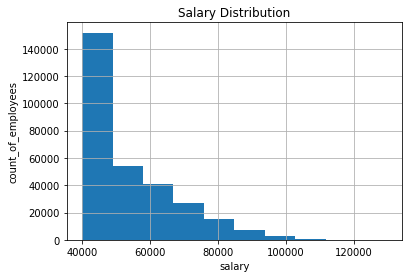

In [78]:
salaries_df_pd['salary'].hist()
plt.xlabel('salary')
plt.ylabel('count_of_employees')
plt.title('Salary Distribution')

In [87]:
#### 9. Bar graph to show the average salary per title

## create a spark dataframe that shows the average salary of each title

title_avg_salary_df = employees_df.join(titles_df, employees_df.emp_title_id == titles_df.title_id) \
                                 .join(salaries_df, 'emp_no').groupBy('title_id').avg('salary')

title_avg_salary_df.persist()

DataFrame[title_id: string, avg(salary): double]

In [113]:
# save that dataframe into a pandas dataframe for plotting

title_avg_salary_df_pd = title_avg_salary_df.withColumn('avg(salary)', round(col('avg(salary)'), 2)) \
                                                .orderBy('avg(salary)', ascending=False).toPandas()

Text(0.5, 1.0, 'Average Salary by title')

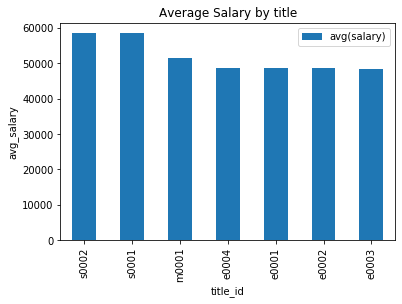

In [114]:
title_avg_salary_df_pd.plot.bar(x='title_id', y='avg(salary)')
plt.ylabel('avg_salary')
plt.title('Average Salary by title')

In [120]:
#### 10. Calculate employee tenure & show the tenure distribution among the employees

# create a pandas dataframe that has just the emp_no and their tenure
# where tenure is calculated as the year of last_date minus year of hire_date if the employee has left
# otherwise it is 2013 (which is the year of max date in data) minus the year of hire_date

emp_tenure_df_pd = employees_df.withColumn('tenure', when(col('left_company') == 1, (year('last_date')-year('hire_date'))) \
                       .otherwise((2013 - year('hire_date')))).select('emp_no', 'tenure').toPandas()

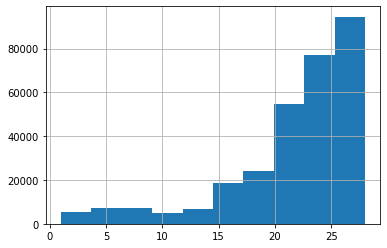

In [122]:
emp_tenure_df_pd['tenure'].hist()

In [125]:
#### 11. count and average salary of male and female employees in the company

employees_df.join(salaries_df, 'emp_no').groupBy('sex').agg(count('emp_no').alias('count'), avg('salary').alias('avg_salary')).show()

+---+------+------------------+
|sex| count|        avg_salary|
+---+------+------------------+
|  F|120051|  52953.8364278515|
|  M|179973|52982.002944886175|
+---+------+------------------+



In [133]:
#### 12. Iteration and total employees by department
from pyspark.sql.types import IntegerType

# create an intermediate spark dataframe that shows the number of employees and employees left
# by each department

dept_count_emp_df = employees_df.join(dept_emp_df, 'emp_no').join(departments_df, 'dept_no').groupBy('dept_name') \
                    .agg(count('emp_no').alias('count_of_employees'), \
                         sum(col('left_company').cast(IntegerType())).alias('Employees_left'))

In [135]:
# now calculate the percentage iteration by each department

dept_count_emp_df.withColumn('pct_iteration', round(col('Employees_left')*100/col('count_of_employees'),2)).show()

+------------------+------------------+--------------+-------------+
|         dept_name|count_of_employees|Employees_left|pct_iteration|
+------------------+------------------+--------------+-------------+
|             Sales|             52245|          5209|         9.97|
|Quality Management|             20117|          2018|        10.03|
|           Finance|             17346|          1647|         9.49|
|        Production|             73485|          7389|        10.06|
|          Research|             21126|          2098|         9.93|
|  Customer Service|             23580|          2414|        10.24|
|         Marketing|             20211|          1941|          9.6|
|       development|             85707|          8508|         9.93|
|   Human Resources|             17786|          1797|         10.1|
+------------------+------------------+--------------+-------------+



In [139]:
#### 13. Average salary by each department

salaries_df.join(dept_emp_df, 'emp_no').join(departments_df, 'dept_no') \
            .groupBy('dept_name').agg(round(avg('salary'),2).alias('avg_salary')).orderBy('avg_salary', ascending=False).show()

+------------------+----------+
|         dept_name|avg_salary|
+------------------+----------+
|             Sales|  69832.13|
|         Marketing|   61095.9|
|           Finance|  59533.52|
|          Research|  48850.19|
|        Production|  48760.45|
|       development|  48697.33|
|  Customer Service|  47998.67|
|Quality Management|  46456.01|
|   Human Resources|  44678.65|
+------------------+----------+



In [144]:
#### 14. Distribution of age of employees

# create a pandas data frame that has the age and emp_no of all employees

employees_w_age_pd = employees_df.withColumn('employee_age', 2013-year('birth_date')) \
                                    .select('emp_no', 'employee_age').toPandas()

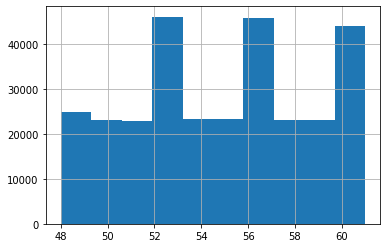

In [146]:
employees_w_age_pd['employee_age'].hist()

In [148]:
#### 15. Average age by sex

employees_df.withColumn('employee_age', 2013-year('birth_date')) \
                                    .groupBy('sex').agg(round(avg('employee_age'),2)).show()

+---+---------------------------+
|sex|round(avg(employee_age), 2)|
+---+---------------------------+
|  F|                      54.92|
|  M|                      54.91|
+---+---------------------------+



#### Building an ML model on the data

In [ ]:
## The first step is feature engineering

In [151]:
print(employees_df.columns)

['emp_no', 'emp_title_id', 'birth_date', 'first_name', 'last_name', 'sex', 'hire_date', 'no_of_projects', 'last_performance_rating', 'left_company', 'last_date']


In [152]:
print(salaries_df.columns)

['emp_no', 'salary']


In [153]:
print(titles_df.columns)

['title_id', 'title']


In [156]:
print(dept_emp_df.columns)

['emp_no', 'dept_no']


In [161]:
print(dept_manager_df.columns)

['dept_no', 'emp_no']


In [170]:
# One thing to note is that in the dept_emp dataset the same employee has been mapped
# to multiple departments on a few occasions

dept_emp_df.count()

331603

In [171]:
dept_emp_df.select('emp_no').distinct().count()

300024

In [172]:
# drop these duplicate rows
dept_emp_df_clean = dept_emp_df.dropDuplicates(['emp_no'])

In [162]:
# Here some of the columns have different values but mean the same thing
# for example, title_id and title and perfectly correlated. So only one of them should be selected in the final data
# similar case is with dept_no and dept_name

# Also in the data provided, there is only one set of managers per department
# therefore, the manager column can be ignored completely as the dept_no column has all the information
# provided by the manager column as well

In [173]:
# join the tables to get all the required features

employees_df_joined = employees_df.join(salaries_df, 'emp_no').join(dept_emp_df_clean, 'emp_no')

In [174]:
employees_df_joined.count()

300024

#### Feature creation

In [177]:
### features to be created
# 1. Age (2013 - birth_date)
# 2. Tenure (2013 - hire_date) if employee is working
#            (last_date - hire_date) if employee has left

In [178]:
## Age

employees_df_joined = employees_df_joined.withColumn('employee_age', 2013-year('birth_date'))

In [180]:
## Tenure

employees_df_joined = employees_df_joined.withColumn('tenure', when(col('left_company') == 1,\
                                                                    (year('last_date')-year('hire_date'))) \
                                                                     .otherwise((2013 - year('hire_date'))))


In [181]:
# Finally the columns that will be selected as features are as follows:

employees_df_joined.printSchema()

root
 |-- emp_no: integer (nullable = true)
 |-- emp_title_id: string (nullable = true)
 |-- birth_date: string (nullable = true)
 |-- first_name: string (nullable = true)
 |-- last_name: string (nullable = true)
 |-- sex: string (nullable = true)
 |-- hire_date: string (nullable = true)
 |-- no_of_projects: integer (nullable = true)
 |-- last_performance_rating: string (nullable = true)
 |-- left_company: boolean (nullable = true)
 |-- last_date: string (nullable = true)
 |-- salary: integer (nullable = true)
 |-- dept_no: string (nullable = true)
 |-- employee_age: integer (nullable = true)
 |-- tenure: integer (nullable = true)



In [184]:
continuous_features = ['no_of_projects', 'salary', 'employee_age', 'tenure']

categorical_features = ['emp_title_id', 'sex', 'dept_no', 'last_performance_rating']

In [198]:
final_employees_df = employees_df_joined.select(*[continuous_features + categorical_features + ['left_company']])\
                            .withColumnRenamed('left_company', 'label')

In [240]:
#create a copy just in case
final_employees_df1 = final_employees_df

In [212]:
final_employees_df1.show()

+--------------+------+------------+------+------------+---+-------+-----------------------+-----+
|no_of_projects|salary|employee_age|tenure|emp_title_id|sex|dept_no|last_performance_rating|label|
+--------------+------+------------+------+------------+---+-------+-----------------------+-----+
|             2| 40000|          60|    23|       s0001|  M|   d002|                      A|false|
|             1| 53422|          59|    22|       e0002|  F|   d004|                      C|false|
|             9| 48973|          55|    21|       e0002|  F|   d004|                      A|false|
|             2| 40000|          56|    26|       s0001|  M|   d003|                      C|false|
|             6| 40000|          61|    22|       e0003|  F|   d006|                      B|false|
|             8| 40000|          54|     7|       e0003|  M|   d006|                      B| true|
|            10| 56087|          56|    22|       s0001|  M|   d003|                      A|false|
|         

In [197]:
from pyspark.ml.feature import OneHotEncoder, StringIndexer, VectorAssembler
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import MulticlassClassificationEvaluator, BinaryClassificationEvaluator

In [194]:
categorical_features

['emp_title_id', 'sex', 'dept_no', 'last_performance_rating']

In [ ]:
[SI_emp_title_id, SI_sex, SI_dept_no, 
 SI_last_performance, OHE_emp_title_id, OHE_sex, OHE_dept_no,
 OHE_last_performance, assembler, rf]

In [230]:
# create string indexers for all columns

SI_emp_title_id = StringIndexer(inputCol='emp_title_id', outputCol='emp_title_id_idx')
SI_sex = StringIndexer(inputCol='sex', outputCol='sex_idx')
SI_dept_no = StringIndexer(inputCol='dept_no', outputCol='dept_no_idx')
SI_last_performance = StringIndexer(inputCol='last_performance_rating', outputCol='last_performance_rating_idx')

In [241]:
# fit and transform the datasets using the string indexers

final_employees_df1 = SI_emp_title_id.fit(final_employees_df1).transform(final_employees_df1)
final_employees_df1 = SI_sex.fit(final_employees_df1).transform(final_employees_df1)

In [244]:
final_employees_df1 = SI_dept_no.fit(final_employees_df1).transform(final_employees_df1)

In [246]:
final_employees_df1 = SI_last_performance.fit(final_employees_df1).transform(final_employees_df1)

In [249]:
# create the one hot encoders

OHE_emp_title_id = OneHotEncoder(inputCol='emp_title_id_idx', outputCol='emp_title_id_vec')
OHE_sex = OneHotEncoder(inputCol='sex_idx', outputCol='sex_vec')
OHE_dept_no = OneHotEncoder(inputCol='dept_no_idx', outputCol='dept_no_vec')
OHE_last_performance = OneHotEncoder(inputCol='last_performance_rating_idx', outputCol='last_performance_rating_vec')

In [254]:
# transform dataset using OHEs

final_employees_df1 = OHE_emp_title_id.transform(final_employees_df1)
final_employees_df1 = OHE_sex.transform(final_employees_df1)
final_employees_df1 = OHE_dept_no.transform(final_employees_df1)
final_employees_df1 = OHE_last_performance.transform(final_employees_df1)

In [259]:
feature_cols = ['emp_title_id_vec', 'sex_vec', 'dept_no_vec', 'last_performance_rating_vec'] + continuous_features

In [260]:
# create the vector assembler

assembler = VectorAssembler(inputCols=feature_cols, outputCol = 'features')

In [262]:
employees_training_df = assembler.transform(final_employees_df1).select('features', 'label')

In [266]:
employees_training_df = employees_training_df.withColumn('label', employees_training_df.label.cast(IntegerType()))

In [267]:
employees_training_df.show()

+--------------------+-----+
|            features|label|
+--------------------+-----+
|(23,[0,6,11,16,19...|    0|
|(23,[2,8,17,19,20...|    0|
|(23,[2,8,16,19,20...|    0|
|(23,[0,6,12,17,19...|    0|
|(23,[1,15,19,20,2...|    0|
|(23,[1,6,15,19,20...|    1|
|(23,[0,6,12,16,19...|    0|
|(23,[3,6,11,16,19...|    1|
|(23,[2,6,16,19,20...|    0|
|(23,[3,13,15,19,2...|    0|
|(23,[2,8,18,19,20...|    0|
|(23,[1,6,7,17,19,...|    1|
|(23,[1,7,17,19,20...|    0|
|(23,[0,9,17,19,20...|    0|
|(23,[2,6,7,17,19,...|    0|
|(23,[4,6,7,17,19,...|    0|
|(23,[0,6,11,15,19...|    0|
|(23,[2,6,8,16,19,...|    0|
|(23,[4,6,17,19,20...|    0|
|(23,[3,9,15,19,20...|    0|
+--------------------+-----+
only showing top 20 rows



In [268]:
# create the Random forest classifier object

rf = RandomForestClassifier(labelCol = 'label', featuresCol = 'features')

In [269]:
# split the dataset into training and testing datasets

train_df, test_df = employees_training_df.randomSplit([0.7, 0.3], seed=42)

In [270]:
# fit the dataset and build the model

model = rf.fit(train_df)

In [271]:
# predict using the transform function

pred = model.transform(test_df)

In [273]:
# function to evaluate the model

def evaluate_model(pred):
    
    eval_accuracy = (MulticlassClassificationEvaluator
        (labelCol="label", predictionCol="prediction", metricName="accuracy"))
  
    eval_precision = (MulticlassClassificationEvaluator
        (labelCol="label", predictionCol="prediction", metricName="weightedPrecision"))
  
    eval_recall = (MulticlassClassificationEvaluator
        (labelCol="label", predictionCol="prediction", metricName="weightedRecall"))
  
    eval_f1 = (MulticlassClassificationEvaluator
        (labelCol="label", predictionCol="prediction", metricName="f1"))

    accuracy = eval_accuracy.evaluate(pred)

    precision =  eval_precision.evaluate(pred)

    recall =  eval_recall.evaluate(pred)

    f1 =  eval_f1.evaluate(pred)

    print(f"""
    Accuracy  = {accuracy}
    Error     = {1-accuracy}
    Precision = {precision}
    Recall    = {recall}
    F1        = {f1}""")

In [279]:
# evaluate the model

evaluate_model(pred)


    Accuracy  = 0.9980220590700325
    Error     = 0.0019779409299675033
    Precision = 0.9980252207788173
    Recall    = 0.9980220590700325
    F1        = 0.9980134773543299


In [276]:
# make predictions on the training df

pred_train = model.transform(train_df)

In [277]:
# training df evaluation

evaluate_model(pred_train)


    Accuracy  = 0.9981475940096041
    Error     = 0.0018524059903959333
    Precision = 0.998150482995197
    Recall    = 0.998147594009604
    F1        = 0.9981402222600019


#### Building the ML pipeline

In [282]:
# combining all the string indexer, one hot encoder and assembler stages
# in the pipeline along with the Random Forest Classifier

pipeline = Pipeline(stages = [SI_emp_title_id, SI_sex, SI_dept_no, 
 SI_last_performance, OHE_emp_title_id, OHE_sex, OHE_dept_no,
 OHE_last_performance, assembler, rf])

In [284]:
# creating another copy of the main dataframe

final_employees_df2 = final_employees_df

In [287]:


final_employees_df2 = final_employees_df2.withColumn('label', final_employees_df2.label.cast(IntegerType()))

In [291]:
training_df, testing_df = final_employees_df2.randomSplit([0.7, 0.3], seed=123)

In [292]:
model2 = pipeline.fit(training_df)

In [293]:
pred_training = model2.transform(training_df)

In [294]:
evaluate_model(pred_training)


    Accuracy  = 0.99801349111073
    Error     = 0.001986508889269989
    Precision = 0.9980163935656063
    Recall    = 0.99801349111073
    F1        = 0.9980050635949742
